# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

### Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [1]:
# Alfabet jawny i szyfrowy
alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

alphabet_size = 26

plaintext = "Zorro fly zealotry zipper"

ciphertext = ""

key = 15 #przesunięcie permutacji czyli klucz szyfrowania

print("Tekst jawny: ", plaintext)

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + alphabet[(alphabet.index(char) + key) % alphabet_size]
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

decodedtext = ""
for text in ciphertext:
    for char in text:
        decodedtext = decodedtext + alphabet[(alphabet.index(char)- key) % alphabet_size]
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Szyfr monoalfabetyczny:
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
2. Co to jest atak siłowy (__brute force__)?  
3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?  
4. Oceń koszt ataku na ten wariant Cezara.

### Zadanie samodzielne dla studentów
1. Napisz ,,ulepszony szyfr Cezara'' czyli monoalfabetyczny szyfr z tajną pemutacją alfabetu szyfrowego
2. Można wykorzystać funkcję random.permutation() z biblioteki numpy

In [2]:
# lepszy Cezar
import numpy as np
plaintext = "Zorro fly zealotry zipper"

# Alfabet jawny
alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# permutacja alfabetu jawnego
permutated_alphabets = np.random.permutation(alphabets).tolist()

encoded_text = ''

print('permutated alhpabet: ' + str(permutated_alphabets))

for c in plaintext.lower().replace(' ', ''):
    encoded_text += permutated_alphabets[alphabets.index(c)]

print("Szyfrogram: ",  encoded_text, "(spacje usunięte)")

decoded_text = ""
for c in encoded_text:
    decoded_text += alphabet[permutated_alphabets.index(c)]
    
print("Oryginalna wiadomość: ",  decoded_text, "(spacje usunięte)")

permutated alhpabet: ['w', 'i', 'g', 'a', 'k', 'p', 'v', 'd', 'o', 'y', 'f', 's', 'e', 'c', 'b', 'n', 'j', 'm', 'h', 'x', 'z', 'q', 'u', 't', 'l', 'r']
Szyfrogram:  rbmmbpslrkwsbxmlronnkm (spacje usunięte)
Oryginalna wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć.

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach.

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu.

### Zadanie samodzielne dla studentów
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

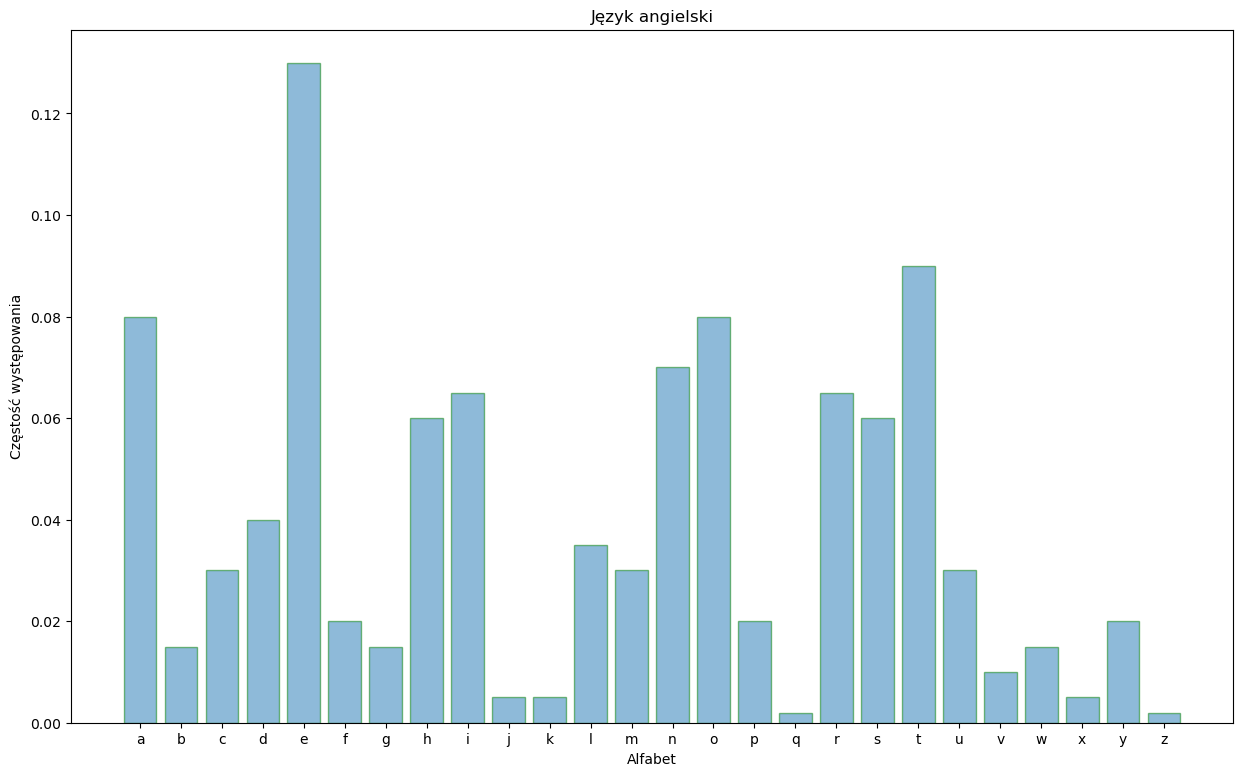

In [3]:
from matplotlib import pyplot as plt
import numpy as np

frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(26)
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), alphabet)
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej.
3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

In [4]:
def plot_freq_chart(alphabet, text, title):
    dict_counter = {}
    for c in text:
        c = c.lower()
        if c not in dict_counter.keys():
            dict_counter[c] = 1
        else:
            dict_counter[c] += 1
    
    text_len = len(text)
    frequency = [0 for _ in range(len(alphabet))]
    for key, val in dict_counter.items():
        frequency[ord(key) - ord('a')] = val/text_len
        
    labels = np.arange(26)
    plt.figure(figsize=(15,9))
    plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
    plt.xlabel('Alfabet')
    plt.xticks(np.arange(26), alphabet)
    plt.title(title);
    plt.ylabel('Częstość występowania')
    plt.show()

#### Analiza częstości występowania liter w tekście jawnym

Tekst jawny:  TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem


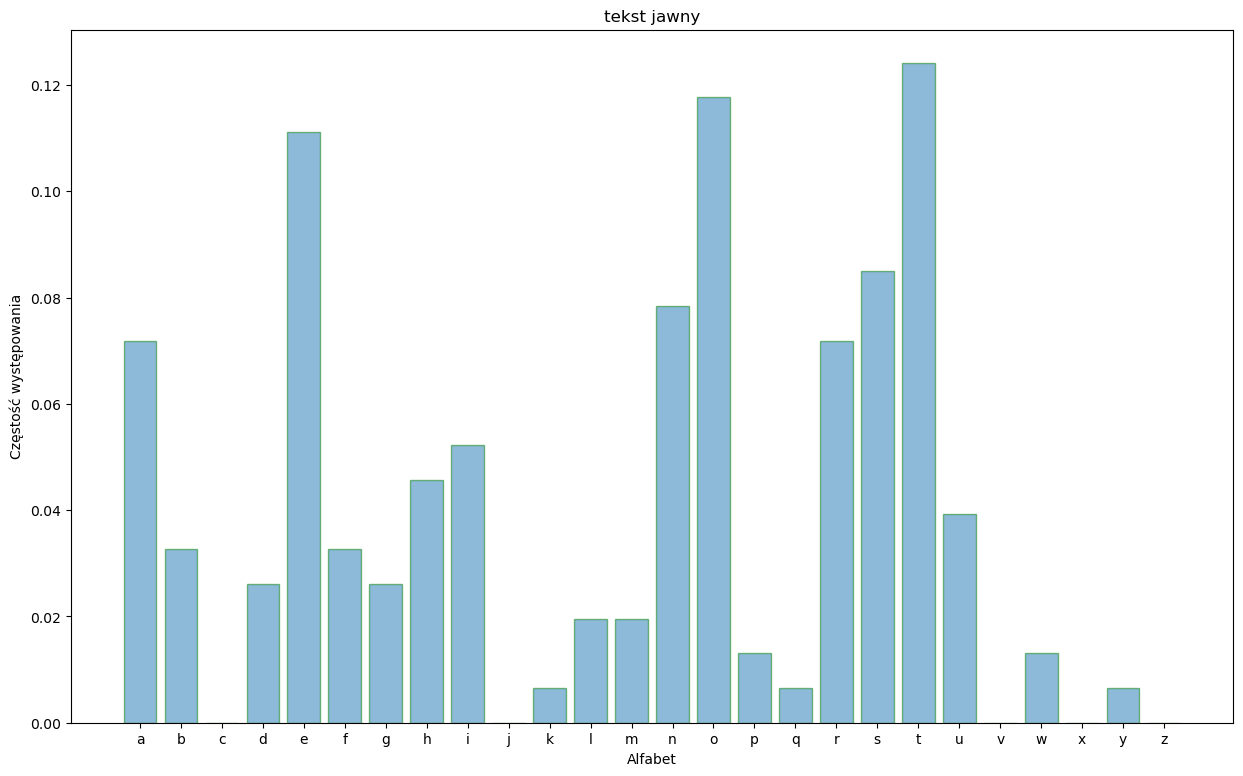

In [5]:
import numpy as np
from matplotlib import pyplot as plt

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]

print("Tekst jawny: ", plaintext)
plot_freq_chart(alphabet, plaintext, "tekst jawny")

#### Analiza częstości występowania liter w szyfrogramie - szyfr Cezara z dowolnym przesunięciem

Szyfrogram:  idqtdgcdiidqtiwpixhiwtfjthixdclwtiwtgixhcdqatgxciwtbxcsidhjuutgiwthaxcvhpcspggdlhdudjigpvtdjhudgijctdgidipztpgbhpvpxchiphtpduigdjqathpcsqndeedhxcvtcsiwtb (spacje usunięte)


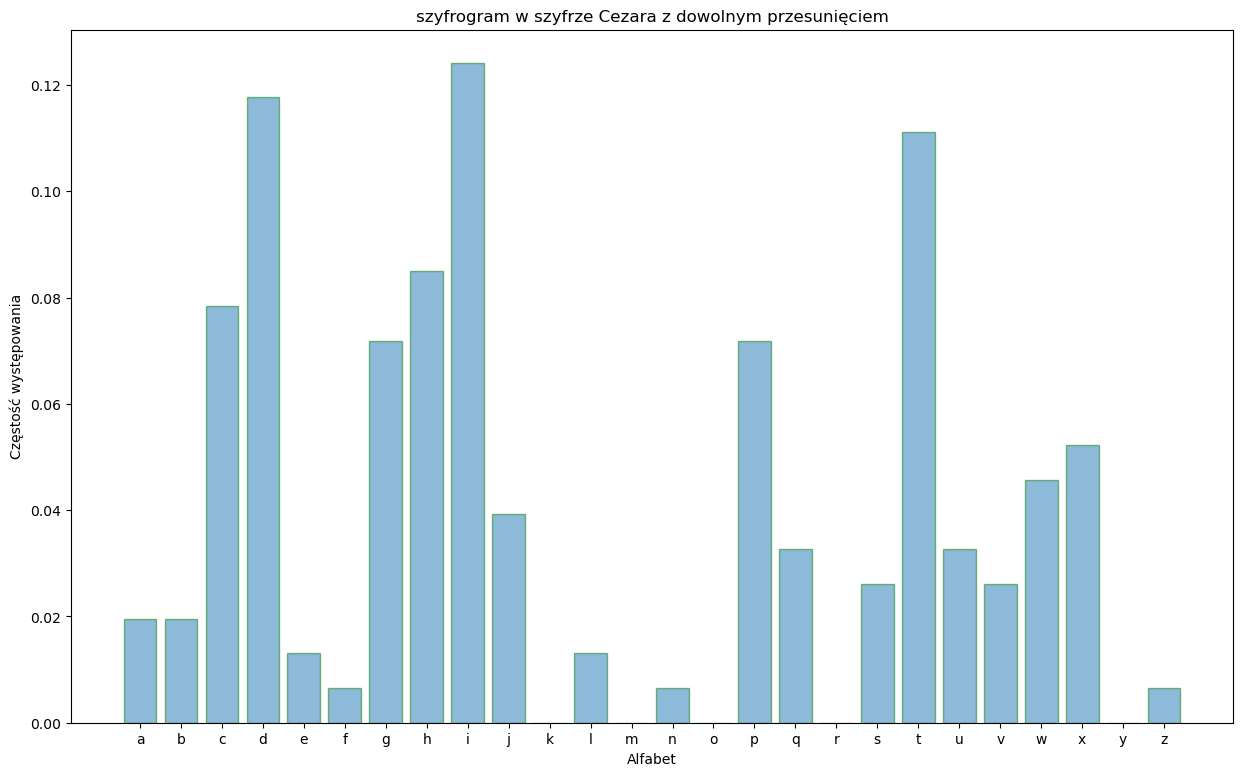

In [6]:
key = 15 #przesunięcie permutacji czyli klucz szyfrowania

encoded_text = ''
for c in plaintext:
    c = c.lower()
    encoded_text += alphabet[(alphabet.index(c) + key) % alphabet_size]
print("Szyfrogram: ",  encoded_text, "(spacje usunięte)")

plot_freq_chart(alphabet, encoded_text, "szyfrogram w szyfrze Cezara z dowolnym przesunięciem")

#### Analiza częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

Szyfrogram:  fvmtvhuvffvmtfdqfyefdtcktefyvuldtfdthfyeuvmpthyufdtzyuafvekwwthfdtepyujequaqhhvlevwvkfhqjtvkewvhfkutvhfvfqotqhzeqjqyuefqetqvwfhvkmptequamivrrveyujtuafdtz (spacje usunięte)


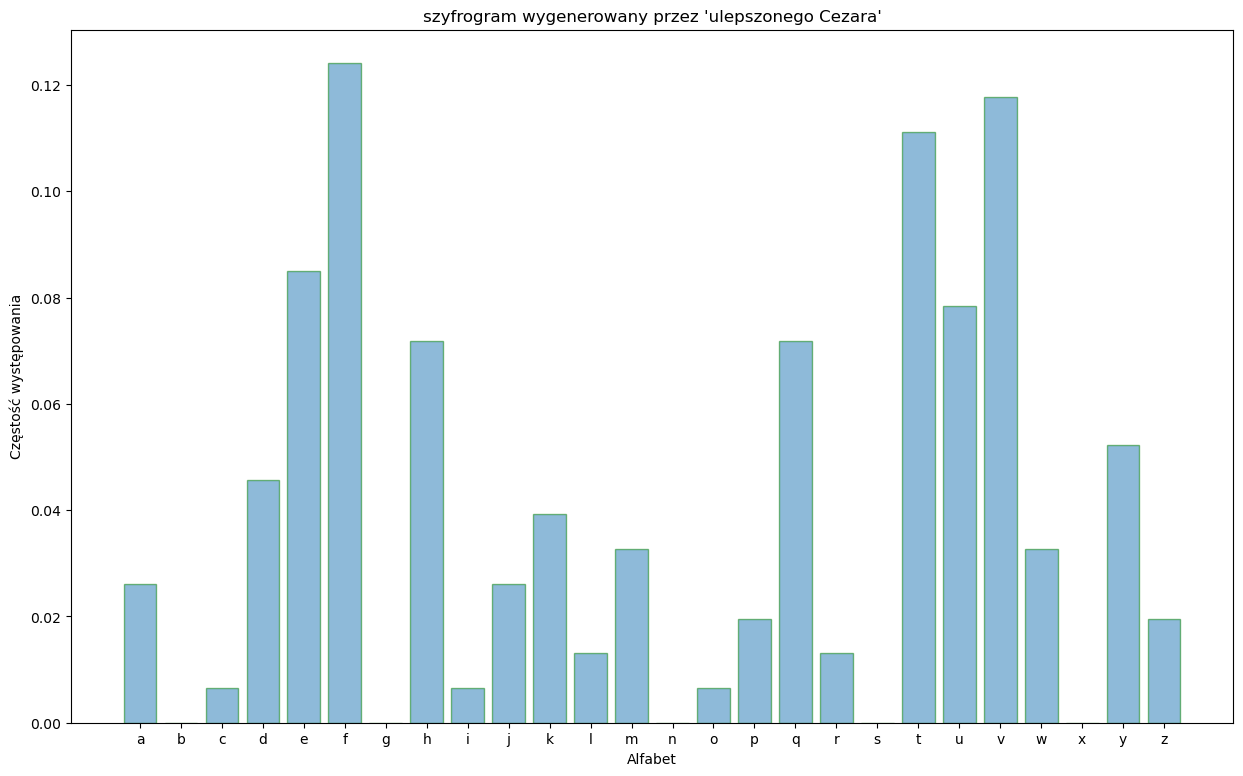

In [7]:
permutated_alphabets = np.random.permutation(alphabets).tolist()

encoded_text = ''
for c in plaintext:
    c = c.lower()
    encoded_text += permutated_alphabets[alphabets.index(c)]
    
print("Szyfrogram: ",  encoded_text, "(spacje usunięte)")

plot_freq_chart(alphabet, encoded_text, "szyfrogram wygenerowany przez 'ulepszonego Cezara'")

## Podsumowanie
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter w alfabetach szyfrowych.

### Zadanie samodzielne dla studentów
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_
2. Dokonaj analizy częstościowej szyfrogramu zaszyfrowanego szyfrem Vigenera


In [8]:
def vigenere_cipher(plaintext, key):
    alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
    ]
    alphabet_size = 26

    encoded_text = ''
    for i, c in enumerate(plaintext):
        c_key = key[i % len(key)]
        encoded_text += alphabet[(alphabet.index(c) + alphabet.index(c_key)) % alphabet_size]

    decoded_text = ''
    for i, c in enumerate(encoded_text):
        c_key = key[i % len(key)]
        decoded_text += alphabet[(alphabet.index(c) - alphabet.index(c_key)) % alphabet_size]
    
    return encoded_text, decoded_text

In [9]:
plaintext = "tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem"
key = "klucz"

encoded_text, decoded_text = vigenere_cipher(plaintext, key)

print("Szyfrogram: ",  encoded_text, "(spacje usunięte)", end="\n\n")
print("Odszyfrowana wiadomość: ",  decoded_text, "(spacje usunięte)")

Szyfrogram:  dzvgnbyivsymyvgkecusrpkwdcecqmgsyvgocnkrxzvndbthvgoxcpcdzmwepplvgodfkmqdupckclqvczzqtdcuidyfmhnbeopdycnqskvycqwduizsymvzcpuqedciwavpmcmnmsqozzmkmqphfsrpg (spacje usunięte)

Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


#### Analiza częstości występowania liter w szyfrogramie wygenerowanym przez szyfr Vigenera - klucz: 'klucz'

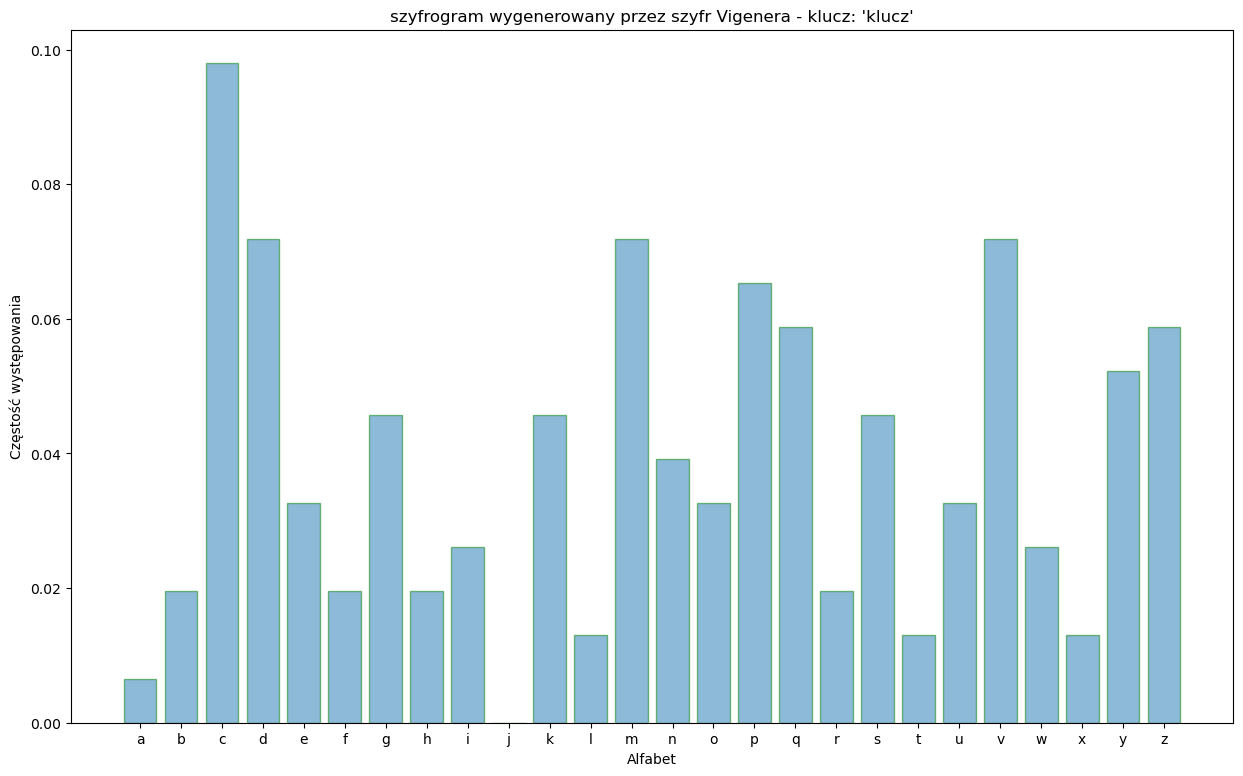

In [10]:
plot_freq_chart(alphabet, encoded_text, f"szyfrogram wygenerowany przez szyfr Vigenera - klucz: '{key}'")

#### Analiza częstości występowania liter w szyfrogramie wygenerowanym przez szyfr Vigenera - klucz: 'ksjwpqomcnzvdhqyroityhlm'

Szyfrogram:  dgkadhbavgnwhaxykwamflbgokceddktgggzuayqecjecytzdznixdrfqftailhrysaegurekfmwghciubejxahyxswnqmzddmwadhhavnjzdycqruiblzemcwjkujfawokzvhdbsmwinvduxynjsjvqo (spacje usunięte)

Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


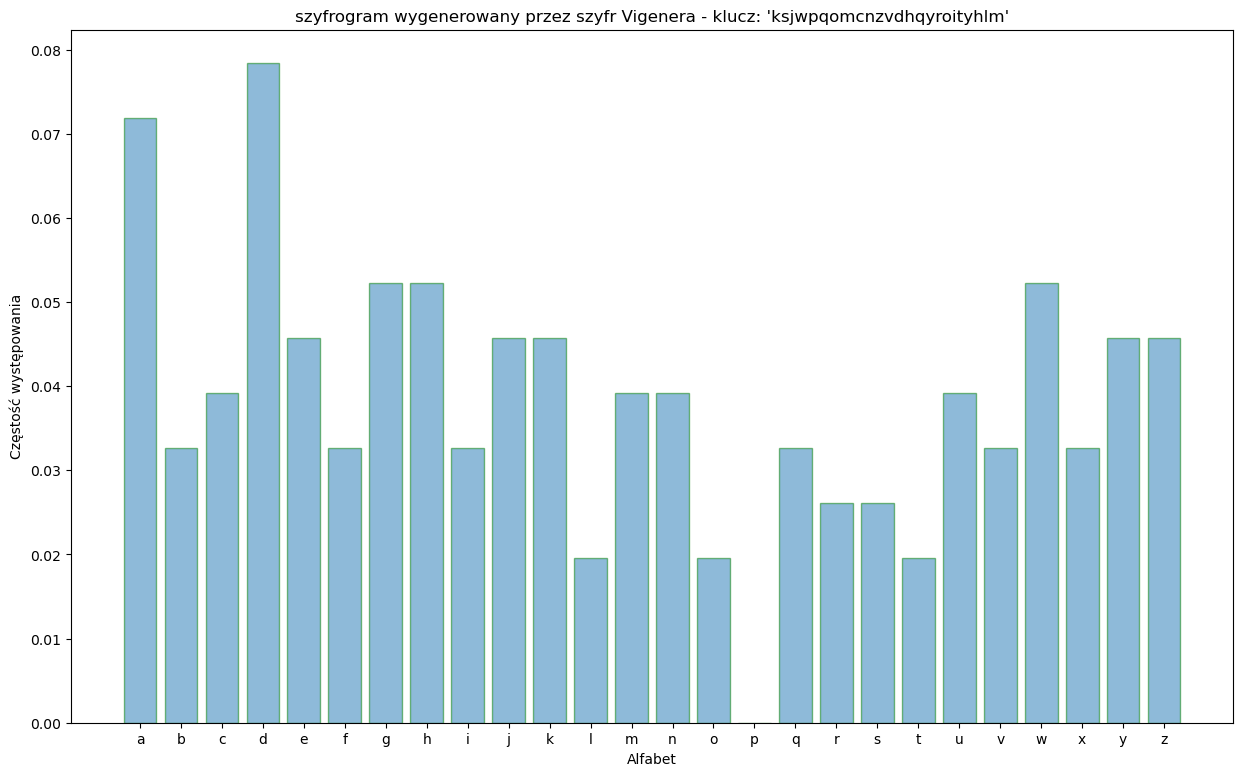

In [11]:
key = "ksjwpqomcnzvdhqyroityhlm"
encoded_text, decoded_text = vigenere_cipher(plaintext, key)

print("Szyfrogram: ",  encoded_text, "(spacje usunięte)", end="\n\n")
print("Odszyfrowana wiadomość: ",  decoded_text, "(spacje usunięte)")

plot_freq_chart(alphabet, encoded_text, f"szyfrogram wygenerowany przez szyfr Vigenera - klucz: '{key}'")

#### Analiza częstości występowania liter w szyfrogramie wygenerowanym przez szyfr Vigenera - klucz: 'oooaaaccc'

Szyfrogram:  hcpeorpqvhcpethcvkghvequguvwcbwhevjgfhwsnodngfwbtheokprhcsufhgthvsslipiuobrarrqyuctcutrcigcigforvwpscftotcmgofasagckpghoseaqhvfcibleucprpmoppqukbusndtjgo (spacje usunięte)

Odszyfrowana wiadomość:  tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem (spacje usunięte)


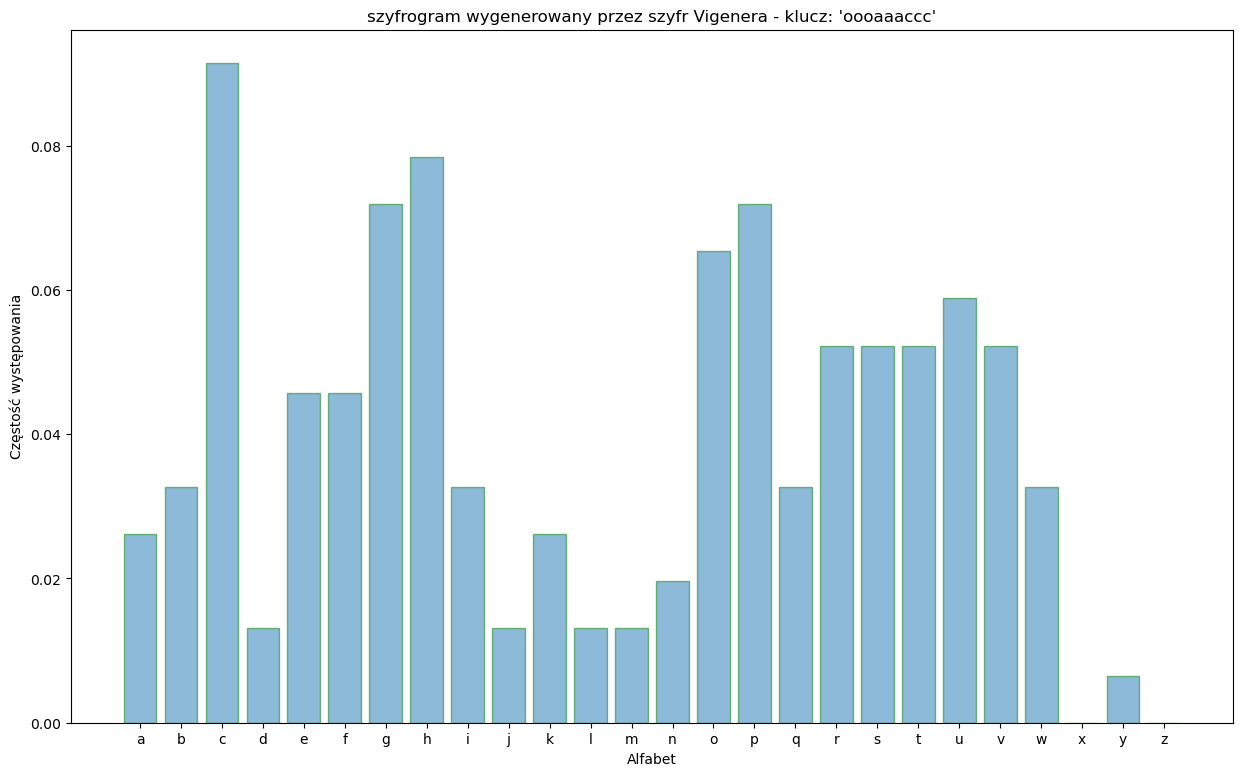

In [12]:
key = "oooaaaccc"
encoded_text, decoded_text = vigenere_cipher(plaintext, key)

print("Szyfrogram: ",  encoded_text, "(spacje usunięte)", end="\n\n")
print("Odszyfrowana wiadomość: ",  decoded_text, "(spacje usunięte)")

plot_freq_chart(alphabet, encoded_text, f"szyfrogram wygenerowany przez szyfr Vigenera - klucz: '{key}'")

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogramu.
- W szyfrze Cezara widać wyraźnie zbliżony rozkład histogramu, co w tekście jawnym. W przypadku szyfru Vigenera, im dłuższy klucz oraz różna częstość występowania liter w nim, tym rozkład histogramu wypłaszcza się.
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
- Im dłuższy klucz, tym wiadomość ciężej jest zdekodować.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy?
- W celach statystycznych oraz dowodzenia błędnego podejścia w doborze kluczy.
4. Jaki klucz gwarantowałby bezpieczeństwo?
- O rozkładzie losowym oraz taki, który ma mało powtórzonych znaków.
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi?
- Rozkład wypłaszczony - taka sama częstość występowania znaków.

## Szyfr polialfabetyczny
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

## Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania?
- Klucz musi być długi, nie mieć powtarzających się znaków, losowo wygenerowany, 
- Taki, który można użyć tylko raz.